<a href="https://colab.research.google.com/github/Gk787/DS-Project/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
print("Customers Dataset:")
print(customers.info())
print(customers.head(), "\n")

print("Products Dataset:")
print(products.info())
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.info())
print(transactions.head(), "\n")

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductI

In [ ]:
print("Missing Values:")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Transactions:\n", transactions.isnull().sum(), "\n")

Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [ ]:
print("Duplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum(), "\n")

Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0 



In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
data = transactions.merge(customers, on='CustomerID', how='left')
data = data.merge(products, on='ProductID', how='left')

In [ ]:
print("Summary Statistics:")
print(data.describe(), "\n")

Summary Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-

In [ ]:
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:")
print(top_products, "\n")

Top 5 Products by Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64 



In [ ]:
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Sales by Region:")
print(region_sales, "\n")

Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64 



In [ ]:
data['Month'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalValue'].sum()

<ipython-input-12-8b49e9fc67ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


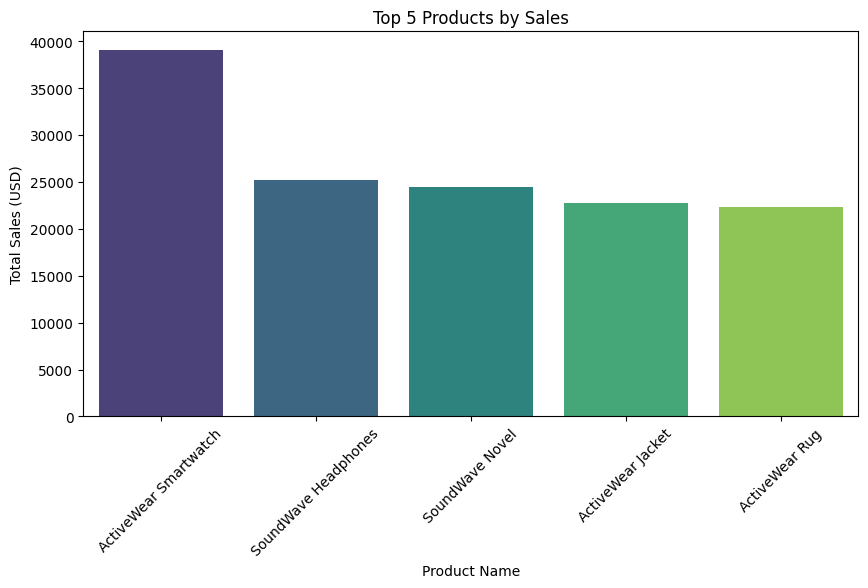

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 5 Products by Sales')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

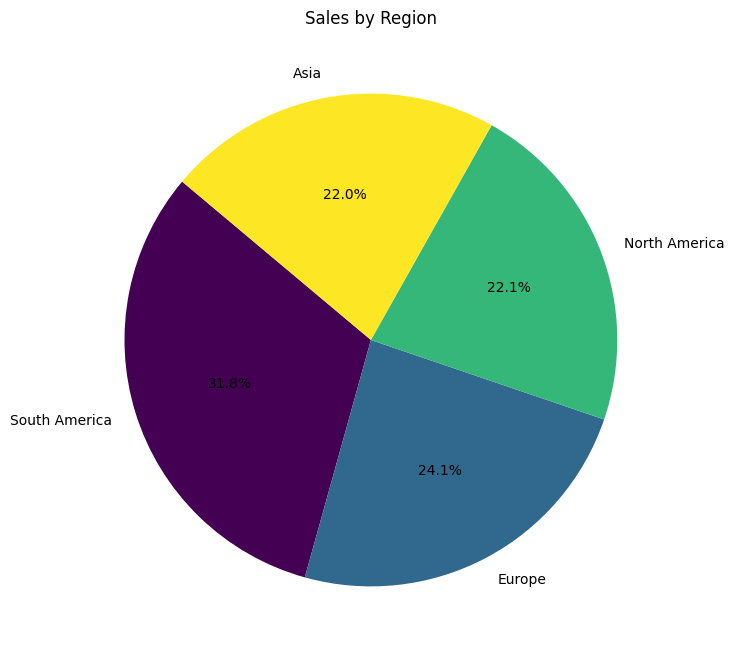

In [ ]:
plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Sales by Region')
plt.ylabel('')
plt.show()

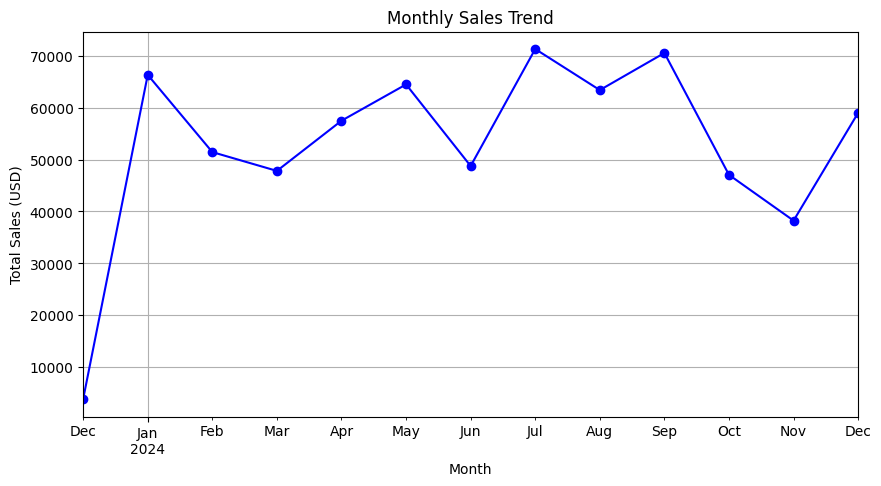

In [ ]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Month')
plt.grid()
plt.show()

<ipython-input-15-3e20e8ba70ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Category', order=data['Category'].value_counts().index, palette='viridis')


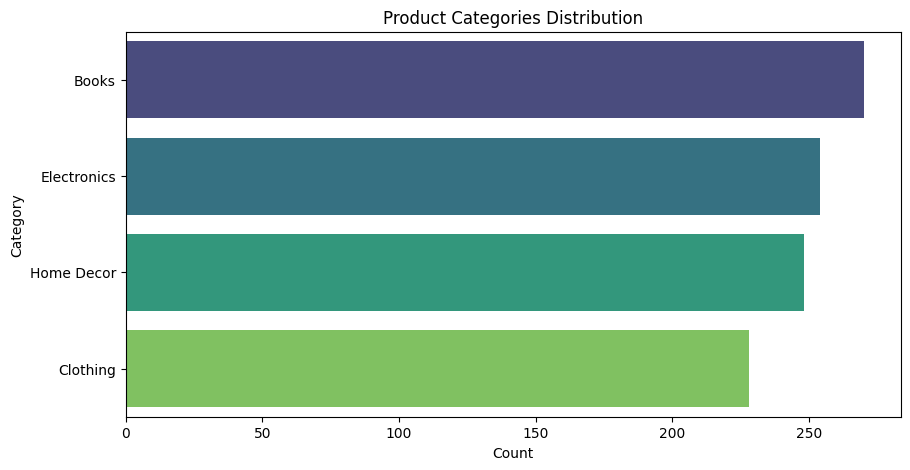

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y='Category', order=data['Category'].value_counts().index, palette='viridis')
plt.title('Product Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()